# Pathway model illustration

## Aims

+ Show how the pathway class works

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
example_results = pd.read_csv('./full_outcome_pathway_trial_example_results.csv', index_col=0)

# Keep only the first 100 patients:
example_results = example_results.iloc[0:100]

In [3]:
example_results

,onset_time_known_bool,onset_to_arrival_mins,onset_to_arrival_on_time_ivt_bool,onset_to_arrival_on_time_mt_bool,arrival_to_scan_mins,arrival_to_scan_on_time_ivt_bool,arrival_to_scan_on_time_mt_bool,onset_to_scan_mins,onset_to_scan_on_time_ivt_bool,time_left_for_ivt_after_scan_mins,...,mt_chosen_bool,scan_to_puncture_mins,onset_to_puncture_mins,mt_mask1_onset_known,mt_mask2_mask1_and_onset_to_arrival_on_time,mt_mask3_mask2_and_arrival_to_scan_on_time,mt_mask4_mask3_and_onset_to_scan_on_time,mt_mask5_mask4_and_enough_time_to_treat,mt_mask6_mask5_and_treated,stroke_type_code
0,True,99.0,True,True,106.0,True,True,205.0,True,65.0,...,False,NaN,NaN,True,True,True,True,True,False,1
1,False,NaN,False,False,185.0,True,True,NaN,False,NaN,...,False,NaN,NaN,False,False,False,False,False,False,1
2,False,NaN,False,False,62.0,True,True,NaN,False,NaN,...,False,NaN,NaN,False,False,False,False,False,False,1
3,True,60.0,True,True,21.0,True,True,81.0,True,189.0,...,False,NaN,NaN,True,True,True,True,True,False,1
4,True,481.0,False,False,97.0,True,True,578.0,False,-0.0,...,False,NaN,NaN,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,NaN,False,False,65.0,True,True,NaN,False,NaN,...,False,NaN,NaN,False,False,False,False,False,False,1
96,False,NaN,False,False,33.0,True,True,NaN,False,NaN,...,False,NaN,NaN,False,False,False,False,False,False,2
97,True,146.0,True,True,73.0,True,True,219.0,True,51.0,...,False,NaN,NaN,True,True,True,True,True,False,1
98,False,NaN,False,False,36.0,True,True,NaN,False,NaN,...,False,NaN,NaN,False,False,False,False,False,False,1


In [4]:
hospital_performance = pd.read_csv('data/hospital_performance_thrombectomy.csv')
hospital_performance = hospital_performance.iloc[0]

In [5]:
hospital_performance.index

Index(['stroke_team', 'admissions', 'proportion_of_all_with_ivt',
       'proportion_of_all_with_mt', 'proportion_of_mt_with_ivt',
       'proportion1_of_all_with_onset_known_ivt',
       'proportion2_of_mask1_with_onset_to_arrival_on_time_ivt',
       'proportion3_of_mask2_with_arrival_to_scan_on_time_ivt',
       'proportion4_of_mask3_with_onset_to_scan_on_time_ivt',
       'proportion5_of_mask4_with_enough_time_to_treat_ivt',
       'proportion6_of_mask5_with_treated_ivt',
       'lognorm_mu_onset_arrival_mins_ivt',
       'lognorm_sigma_onset_arrival_mins_ivt',
       'lognorm_mu_arrival_scan_arrival_mins_ivt',
       'lognorm_sigma_arrival_scan_arrival_mins_ivt',
       'lognorm_mu_scan_needle_mins_ivt', 'lognorm_sigma_scan_needle_mins_ivt',
       'proportion1_of_all_with_onset_known_mt',
       'proportion2_of_mask1_with_onset_to_arrival_on_time_mt',
       'proportion3_of_mask2_with_arrival_to_scan_on_time_mt',
       'proportion4_of_mask3_with_onset_to_scan_on_time_mt',
      

In [6]:
limit_ivt_mins = 4*60
limit_mt_mins = 8*60

# ths

In [7]:
grid = example_results.values
all_array_names = example_results.columns

grid[np.where(grid == True)] = 1  # np.nanmax(grid)
grid[np.where(grid == False)] = 0  # np.nanmin(grid)

grid = np.array(grid, dtype=float).T

In [8]:
# Create a list of patient names in the format
# ['A', 'B', ..., 'Y', 'Z', 'AA', 'AB', ..., 'AZ', 'BA', 'BB'...]
import string
patient_names = []
name_start = ''
i = 0
while len(patient_names) < grid.shape[0]:
    patient_names += [name_start + char for char in string.ascii_uppercase]
    name_start = string.ascii_uppercase[i]
    i += 1
    
patient_names = patient_names[:grid.shape[0]]

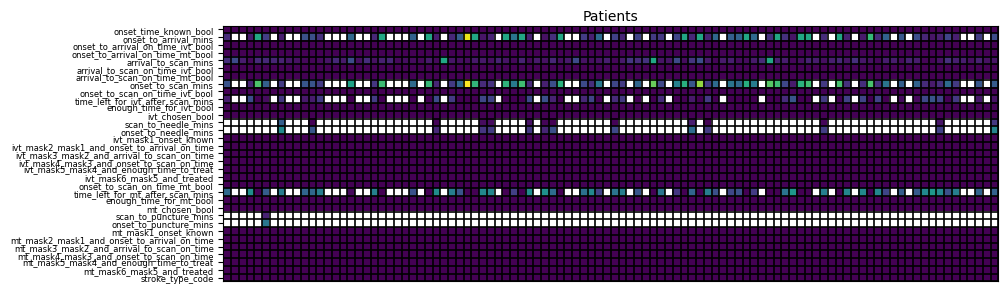

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

c = ax.imshow(grid, 
          # extent=[-0.5, grid.shape[1]-0.5, grid.shape[0]-0.5, -0.5], 
          interpolation='none',
          aspect='equal'
             )

for x in np.arange(-0.5, grid.shape[1]):
    ax.axvline(x, lw=1.2, color='k')
for y in np.arange(-0.5, grid.shape[0]):
    ax.axhline(y, lw=1.2, color='k')
    
     
# ax.set_xticks(np.arange(-0.5, grid.shape[1]), minor=True)
# ax.set_xticklabels(patient_names, rotation=30)
ax.set_xticks([])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel('Patients')

ax.set_yticks(np.arange(0, grid.shape[0]))
ax.set_yticklabels(all_array_names, fontsize=6)

plt.show()

In [10]:
from classes.pathway import SSNAP_Pathway

In [11]:
import inspect

In [12]:
print(inspect.getsource(SSNAP_Pathway._generate_onset_time_known_binomial))

    def _generate_onset_time_known_binomial(self):
        """
        Assign whether onset time is known for each patient.

        Creates:
        --------
        onset_time_known_bool -
            True or False for each patient having a known onset time.
        """
        self.trial['onset_time_known_bool'].data = np.random.binomial(
                1,                          # Number of trials
                self.target_data_dict[      # Probability of success
                    'proportion1_of_all_with_onset_known_ivt'],
                self.patients_per_run       # Number of samples drawn
                ) == 1                      # Convert int to bool
        # n.b. the proportion1_of_all_with_onset_known_ivt is identical
        # to proportion1_of_all_with_onset_known_mt.



In [13]:
from matplotlib.colors import ListedColormap

colour_true = 'white'
f = 50.0/256.0
colour_false = (f, f, f, 1.0)#'DarkGray'
bool_cmap = ListedColormap([colour_false, colour_true])

In [14]:
def make_bins(mu, sigma):
    steps = np.arange(-2.0, 2.5, 0.5)
    log_bins = mu + steps * sigma
    bins = np.exp(log_bins)
    
    log_bin_labels = []
    bin_labels = []
    for step in steps:
        log_bin_label = r'$\mu$'
        # Long-winded if/elses to prevent printing +0sigma or +0(1/2)sigma.
        if step > 0.0:
            log_bin_label += ' +'
        elif step < 0.0:
            log_bin_label += ' -'
        if abs(step) > 1.0:
            log_bin_label += f' {abs(int(step))}'
        if step != 0.0:
            log_bin_label += (int(np.ceil(step % 1.0)) * r'$\frac{1}{2}$' + r'$\sigma$')
        bin_label = 'e$^{' + log_bin_label.replace('$', '') + '}$'
        bin_label = fr'{bin_label}'
        
        log_bin_labels.append(log_bin_label)
        bin_labels.append(bin_label)
    return bins, log_bins, bin_labels, log_bin_labels

In [15]:
def make_colours_for_bins(n_colours, cmap='RdBu'):
    """Assign colours for the bins."""
    colours_bars = []
    cmap = plt.get_cmap(cmap)
    for i in np.linspace(0.0, 1.0, n_colours + 2):
        colours_bars.append(cmap(i))
    # Define over and under colours
    # e.g. for patients falling outside the bins with these colours.
    colour_under = colours_bars[0]
    colour_over = colours_bars[-1]
    colours_bars = colours_bars[1:-1]
    return colours_bars, colour_under, colour_over

In [16]:
def draw_row(ax, row_data, y, cmap='viridis', label='', ytick_list=[], yticklabel_list=[], bins=[]):
    row_data_2d = row_data.reshape(1, len(row_data))
    
    if len(bins) == 0:
        bins = [np.nanmin(row_data_2d), np.nanmax(row_data_2d)]
    c = ax.imshow(row_data_2d, cmap=cmap, vmin=bins[0], vmax=bins[-1],
                  extent=[-0.5, len(row_data)-0.5, y-0.5, y+0.5])
    ytick_list.append(y)
    yticklabel_list.append(label)
    return ax, ytick_list, yticklabel_list

In [17]:
def grid_setup(ax, grid, colour_true, colour_false, ytick_list=[]):
    # Figure setup:
    
    # Draw borders around the squares:
    for y in ytick_list:
        # for a in [0.5, -0.5]:
            # ax.axhline(y+a, lw=1.2, color='k')
        ax.hlines([y-0.5, y+0.5], -0.5, grid.shape[1] - 0.5, lw=1.2, color='k')
        ax.vlines(np.arange(-0.5, grid.shape[1]), y+0.5, y-0.5, lw=1.2, color='k')

    ax.set_xticks([])
    # ax.set_xticks(np.arange(0, grid.shape[1]), minor=True)
    # ax.xaxis.set_ticks_position('top')
    # ax.xaxis.set_label_position('top')
    # ax.set_xlabel('Patient')
    ax.set_yticks(ytick_list)
    ax.set_yticklabels(yticklabel_list, fontsize=6)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)
    # Set axis limits so that borders around squares are not cut off.
    pad = 0.2
    ax.set_xlim(-(0.5 + pad), grid.shape[1] - 0.5 + pad)
    ax.set_ylim(-(np.max(np.abs(ytick_list)) + 0.5 + pad), 0.5 + pad)

    # Fake a legend for the boolean arrays:
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=colour_true, edgecolor='k', linewidth=1.2, label='True'),
        Patch(facecolor=colour_false, edgecolor='k', linewidth=1.2, label='False')
        ]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.0, 2.0), ncol=2)
    return ax

In [18]:
def make_colours(times, mu, sigma):
    bins, log_bins, bin_labels, log_bin_labels = make_bins(mu, sigma)
    colours_bars, colour_under, colour_over = make_colours_for_bins(
        len(bins)-1, cmap='RdBu_r')
    
    # Make the colourmap:
    times_cmap = ListedColormap(colours_bars)
    times_cmap.set_under(colour_under)
    times_cmap.set_over(colour_over)
    times_cmap.set_bad(colour_false)

    return times_cmap, colours_bars, colour_under, colour_over, bins, log_bins, bin_labels, log_bin_labels

In [19]:
times = example_results['onset_to_arrival_mins'].values
times = times[np.where(times < 481)]

mu = hospital_performance['lognorm_mu_onset_arrival_mins_ivt']
sigma = hospital_performance['lognorm_sigma_onset_arrival_mins_ivt']

(times_cmap_onset_to_arrival, 
 colours_bars_onset_to_arrival, 
 colour_under_onset_to_arrival, 
 colour_over_onset_to_arrival, 
 bins_onset_to_arrival, 
 log_bins_onset_to_arrival,
 bin_labels_onset_to_arrival, 
 log_bin_labels_onset_to_arrival
) = make_colours(times, mu, sigma)

In [20]:
times = example_results['arrival_to_scan_mins'].values
times = times[np.where(times < 481)]

mu = hospital_performance['lognorm_mu_arrival_scan_arrival_mins_ivt']
sigma = hospital_performance['lognorm_sigma_arrival_scan_arrival_mins_ivt']

(times_cmap_arrival_to_scan, 
 colours_bars_arrival_to_scan, 
 colour_under_arrival_to_scan, 
 colour_over_arrival_to_scan, 
 bins_arrival_to_scan, 
 log_bins_arrival_to_scan,
 bin_labels_arrival_to_scan, 
 log_bin_labels_arrival_to_scan,) = make_colours(times, mu, sigma)

In [21]:
times = example_results['scan_to_needle_mins'].values
# times = times[np.where(times < 481)]

mu = hospital_performance['lognorm_mu_scan_needle_mins_ivt']
sigma = hospital_performance['lognorm_sigma_scan_needle_mins_ivt']

(times_cmap_scan_to_needle, 
 colours_bars_scan_to_needle, 
 colour_under_scan_to_needle, 
 colour_over_scan_to_needle, 
 bins_scan_to_needle, 
 log_bins_scan_to_needle,
 bin_labels_scan_to_needle, 
 log_bin_labels_scan_to_needle) = make_colours(times, mu, sigma)

In [22]:
times = example_results['scan_to_puncture_mins'].values
# times = times[np.where(times < 481)]

mu = hospital_performance['lognorm_mu_scan_puncture_mins_mt']
sigma = hospital_performance['lognorm_sigma_scan_puncture_mins_mt']

(times_cmap_scan_to_puncture, 
 colours_bars_scan_to_puncture, 
 colour_under_scan_to_puncture, 
 colour_over_scan_to_puncture, 
 bins_scan_to_puncture, 
 log_bins_scan_to_puncture, 
 bin_labels_scan_to_puncture, 
 log_bin_labels_scan_to_puncture) = make_colours(times, mu, sigma)

In [23]:
# Fudge time
times = example_results['onset_to_scan_mins'].values
# times = times[np.where(times < 481)]

mu = np.nanmean(np.log(times))
sigma = np.nanstd(np.log(times))

(times_cmap_onset_to_scan, 
 colours_bars_onset_to_scan, 
 colour_under_onset_to_scan, 
 colour_over_onset_to_scan, 
 bins_onset_to_scan, 
 log_bins_onset_to_scan,
 bin_labels_onset_to_scan, 
 log_bin_labels_onset_to_scan) = make_colours(times, mu, sigma)

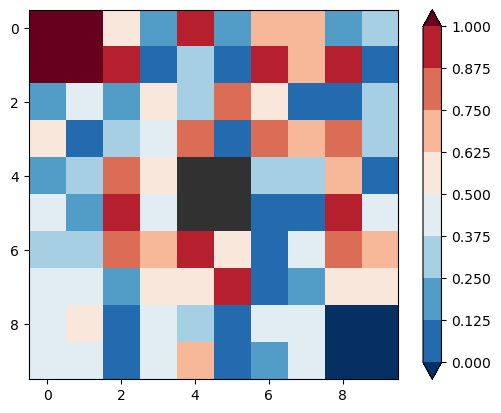

In [24]:
fake_arr = np.random.rand(10, 10)
# Set some under and over values
fake_arr[:2, :2] = 2
fake_arr[-2:, -2:] = -2
fake_arr[4:6, 4:6] = np.NaN
plt.imshow(fake_arr, cmap=times_cmap_onset_to_arrival, vmin=0.0, vmax=1.0)
plt.colorbar(extend='both', ticks=np.linspace(0.0, 1.0, len(colours_bars_onset_to_arrival)+1))
plt.show()

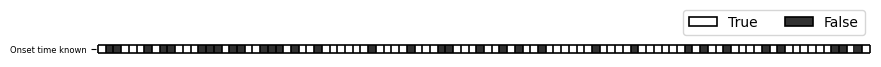

In [25]:
fig, ax = plt.subplots(figsize=(10, 0.8))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['onset_time_known_bool'].values, 0, 
    bool_cmap, 'Onset time known', ytick_list, yticklabel_list
    )

ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
ax.set_ylim(-1, 2.5)  # To fit in legend
plt.savefig('./pathway_worked_example/grid_onset_known.png')
plt.show()

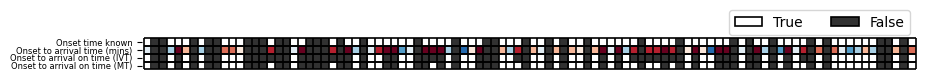

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['onset_time_known_bool'].values, 0, 
    bool_cmap, 'Onset time known', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['onset_to_arrival_mins'].values), -1, 
    times_cmap_onset_to_arrival, 'Onset to arrival time (mins)', ytick_list, yticklabel_list,
    log_bins_onset_to_arrival
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['onset_to_arrival_on_time_ivt_bool'].values, -2, 
    bool_cmap, 'Onset to arrival on time (IVT)', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['onset_to_arrival_on_time_mt_bool'].values, -3, 
    bool_cmap, 'Onset to arrival on time (MT)', ytick_list, yticklabel_list
    )

ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
plt.savefig('./pathway_worked_example/grid_onset_times.png', bbox_inches='tight')
plt.show()

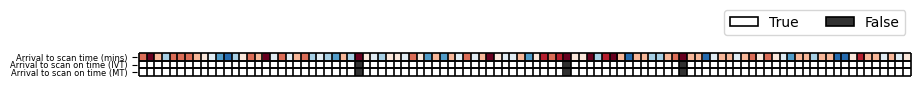

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['arrival_to_scan_mins'].values), 0,
    times_cmap_arrival_to_scan, 'Arrival to scan time (mins)', ytick_list, yticklabel_list,
    log_bins_arrival_to_scan
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['arrival_to_scan_on_time_ivt_bool'].values, -1, 
    bool_cmap, 'Arrival to scan on time (IVT)', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['arrival_to_scan_on_time_mt_bool'].values, -2, 
    bool_cmap, 'Arrival to scan on time (MT)', ytick_list, yticklabel_list
    )

ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
ax.set_ylim(-3, 2)
plt.savefig('./pathway_worked_example/grid_arrival_to_scan_times.png', bbox_inches='tight')
plt.show()

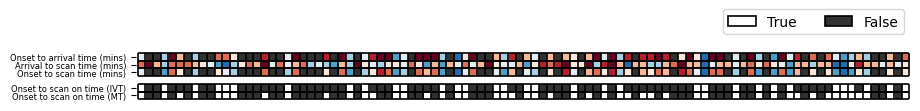

In [28]:
fig, ax = plt.subplots(figsize=(10, 4))
ytick_list = []
yticklabel_list = []

# ax, ytick_list, yticklabel_list = draw_row(
#     ax, example_results['onset_time_known_bool'].values, 0, 
#     bool_cmap, 'Onset time known', ytick_list, yticklabel_list
#     )

ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['onset_to_arrival_mins'].values), 0, 
    times_cmap_onset_to_arrival, 'Onset to arrival time (mins)', ytick_list, yticklabel_list,
    log_bins_onset_to_arrival
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['arrival_to_scan_mins'].values), -1, 
    times_cmap_arrival_to_scan, 'Arrival to scan time (mins)', ytick_list, yticklabel_list,
    log_bins_arrival_to_scan
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['onset_to_scan_mins'].values), -2, 
    times_cmap_onset_to_scan, 'Onset to scan time (mins)', ytick_list, yticklabel_list,
    log_bins_onset_to_scan
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['onset_to_scan_on_time_ivt_bool'].values, -4, 
    bool_cmap, 'Onset to scan on time (IVT)', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['onset_to_scan_on_time_mt_bool'].values, -5, 
    bool_cmap, 'Onset to scan on time (MT)', ytick_list, yticklabel_list
    )

ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
plt.savefig('./pathway_worked_example/grid_onset_to_scan_times.png', bbox_inches='tight')
plt.show()

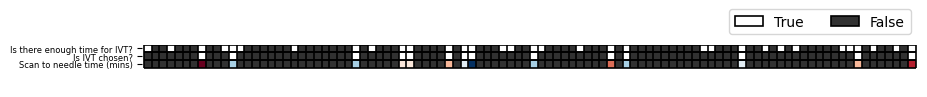

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['enough_time_for_ivt_bool'].values, 0, 
    bool_cmap, 'Is there enough time for IVT?', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_chosen_bool'].values, -1, 
    bool_cmap, 'Is IVT chosen?', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['scan_to_needle_mins'].values), -2, 
    times_cmap_scan_to_needle, 'Scan to needle time (mins)', ytick_list, yticklabel_list,
    log_bins_scan_to_needle
    )

ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
ax.set_ylim(-5, 0.5)
plt.savefig('./pathway_worked_example/grid_scan_to_needle_times.png', bbox_inches='tight')
plt.show()

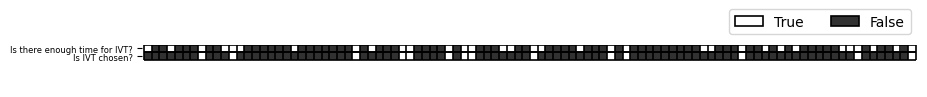

In [80]:
fig, ax = plt.subplots(figsize=(10, 4))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['enough_time_for_ivt_bool'].values, 0, 
    bool_cmap, 'Is there enough time for IVT?', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_chosen_bool'].values, -1, 
    bool_cmap, 'Is IVT chosen?', ytick_list, yticklabel_list
    )

ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
ax.set_ylim(-5, 0.5)
plt.savefig('./pathway_worked_example/grid_ivt_chosen.png', bbox_inches='tight')
plt.show()

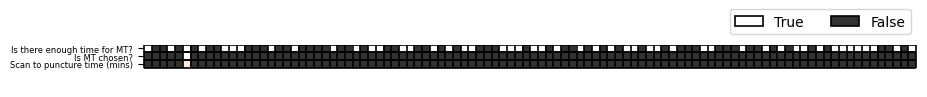

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['enough_time_for_mt_bool'].values, 0, 
    bool_cmap, 'Is there enough time for MT?', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_chosen_bool'].values, -1, 
    bool_cmap, 'Is MT chosen?', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['scan_to_puncture_mins'].values), -2, 
    times_cmap_scan_to_puncture, 'Scan to puncture time (mins)', ytick_list, yticklabel_list,
    log_bins_scan_to_puncture
    )


ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
ax.set_ylim(-5, 0.5)
plt.savefig('./pathway_worked_example/grid_scan_to_puncture_times.png', bbox_inches='tight')
plt.show()

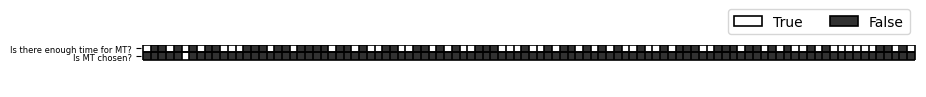

In [81]:
fig, ax = plt.subplots(figsize=(10, 4))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['enough_time_for_mt_bool'].values, 0, 
    bool_cmap, 'Is there enough time for MT?', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_chosen_bool'].values, -1, 
    bool_cmap, 'Is MT chosen?', ytick_list, yticklabel_list
    )

ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
ax.set_ylim(-5, 0.5)
plt.savefig('./pathway_worked_example/grid_mt_chosen.png', bbox_inches='tight')
plt.show()

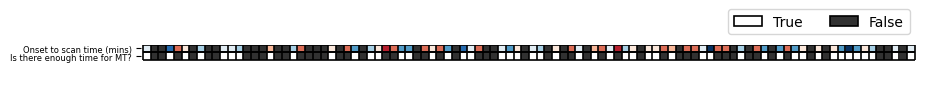

In [94]:
# fig, ax = plt.subplots(figsize=(10, 4))
# ytick_list = []
# yticklabel_list = []

# ax, ytick_list, yticklabel_list = draw_row(
#     ax, np.log(example_results['onset_to_scan_mins'].values), 0, 
#     times_cmap_onset_to_scan, 'Onset to scan time (mins)', ytick_list, yticklabel_list,
#     log_bins_onset_to_scan
#     )


# ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
# ax.set_ylim(-5, 0.5)
# plt.savefig('./pathway_worked_example/grid_time_for_mt.png', bbox_inches='tight')
# plt.show()

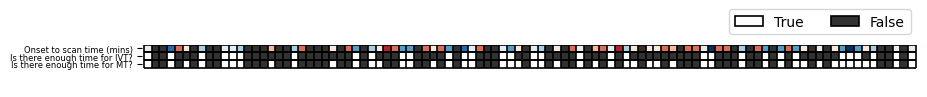

In [96]:
fig, ax = plt.subplots(figsize=(10, 4))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['onset_to_scan_mins'].values), 0, 
    times_cmap_onset_to_scan, 'Onset to scan time (mins)', ytick_list, yticklabel_list,
    log_bins_onset_to_scan
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['enough_time_for_ivt_bool'].values, -1, 
    bool_cmap, 'Is there enough time for IVT?', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['enough_time_for_mt_bool'].values, -2, 
    bool_cmap, 'Is there enough time for MT?', ytick_list, yticklabel_list
    )

ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
ax.set_ylim(-5, 0.5)
plt.savefig('./pathway_worked_example/grid_time_for_treatment.png', bbox_inches='tight')
plt.show()

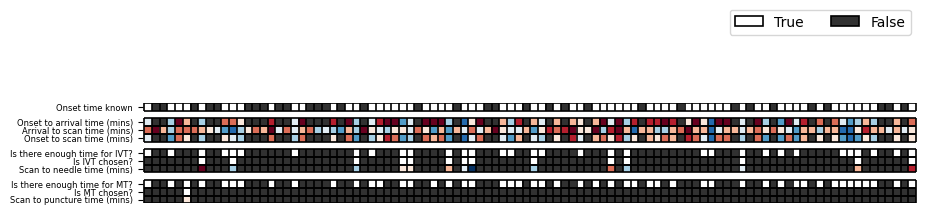

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
ytick_list = []
yticklabel_list = []

i = 0
ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['onset_time_known_bool'].values, -i, 
    bool_cmap, 'Onset time known', ytick_list, yticklabel_list
    )

i+=1
i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['onset_to_arrival_mins'].values), -i, 
    times_cmap_onset_to_arrival, 'Onset to arrival time (mins)', ytick_list, yticklabel_list,
    log_bins_onset_to_arrival
    )

# i+=1
# ax, ytick_list, yticklabel_list = draw_row(
#     ax, example_results['onset_to_arrival_on_time_ivt_bool'].values, -i, 
#     bool_cmap, 'Onset to arrival on time (IVT)', ytick_list, yticklabel_list
#     )


# i+=1
# ax, ytick_list, yticklabel_list = draw_row(
#     ax, example_results['onset_to_arrival_on_time_mt_bool'].values, -i, 
#     bool_cmap, 'Onset to arrival on time (MT)', ytick_list, yticklabel_list
#     )

i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['arrival_to_scan_mins'].values), -i,
    times_cmap_arrival_to_scan, 'Arrival to scan time (mins)', ytick_list, yticklabel_list,
    log_bins_arrival_to_scan
    )

# i+=1
# ax, ytick_list, yticklabel_list = draw_row(
#     ax, example_results['arrival_to_scan_on_time_ivt_bool'].values, -i, 
#     bool_cmap, 'Arrival to scan on time (IVT)', ytick_list, yticklabel_list
#     )

# i+=1
# ax, ytick_list, yticklabel_list = draw_row(
#     ax, example_results['arrival_to_scan_on_time_mt_bool'].values, -i, 
#     bool_cmap, 'Arrival to scan on time (MT)', ytick_list, yticklabel_list
#     )


i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['onset_to_scan_mins'].values), -i, 
    times_cmap_onset_to_scan, 'Onset to scan time (mins)', ytick_list, yticklabel_list
    )

# i+=1
# ax, ytick_list, yticklabel_list = draw_row(
#     ax, example_results['onset_to_scan_on_time_ivt_bool'].values, -i, 
#     bool_cmap, 'Onset to scan on time (IVT)', ytick_list, yticklabel_list
#     )

# i+=1
# ax, ytick_list, yticklabel_list = draw_row(
#     ax, example_results['onset_to_scan_on_time_mt_bool'].values, -i, 
#     bool_cmap, 'Onset to scan on time (MT)', ytick_list, yticklabel_list
#     )

i+=1
i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['enough_time_for_ivt_bool'].values, -i, 
    bool_cmap, 'Is there enough time for IVT?', ytick_list, yticklabel_list
    )

i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_chosen_bool'].values, -i, 
    bool_cmap, 'Is IVT chosen?', ytick_list, yticklabel_list
    )

i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['scan_to_needle_mins'].values), -i, 
    times_cmap_scan_to_needle, 'Scan to needle time (mins)', ytick_list, yticklabel_list,
    log_bins_scan_to_needle
    )

i+=1
i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['enough_time_for_mt_bool'].values, -i, 
    bool_cmap, 'Is there enough time for MT?', ytick_list, yticklabel_list
    )

i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_chosen_bool'].values, -i, 
    bool_cmap, 'Is MT chosen?', ytick_list, yticklabel_list
    )

i+=1
ax, ytick_list, yticklabel_list = draw_row(
    ax, np.log(example_results['scan_to_puncture_mins'].values), -i, 
    times_cmap_scan_to_puncture, 'Scan to puncture time (mins)', ytick_list, yticklabel_list,
    log_bins_scan_to_puncture
    )



ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
ax.set_ylim(-i-0.5, 0.5)
plt.savefig('./pathway_worked_example/grid_summary.png', bbox_inches='tight')
plt.show()

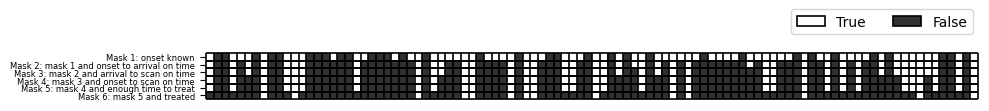

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_mask1_onset_known'].values, 0, 
    bool_cmap, 'Mask 1: onset known', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_mask2_mask1_and_onset_to_arrival_on_time'].values, -1, 
    bool_cmap, 'Mask 2: mask 1 and onset to arrival on time', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_mask3_mask2_and_arrival_to_scan_on_time'].values, -2, 
    bool_cmap, 'Mask 3: mask 2 and arrival to scan on time', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_mask4_mask3_and_onset_to_scan_on_time'].values, -3, 
    bool_cmap, 'Mask 4: mask 3 and onset to scan on time', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_mask5_mask4_and_enough_time_to_treat'].values, -4, 
    bool_cmap, 'Mask 5: mask 4 and enough time to treat', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['ivt_mask6_mask5_and_treated'].values, -5, 
    bool_cmap, 'Mask 6: mask 5 and treated', ytick_list, yticklabel_list
    )


ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
plt.savefig('./pathway_worked_example/grid_masks_ivt.png', bbox_inches='tight')
plt.show()

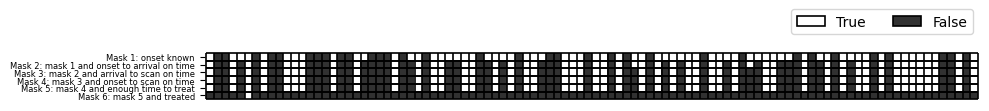

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
ytick_list = []
yticklabel_list = []

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_mask1_onset_known'].values, 0, 
    bool_cmap, 'Mask 1: onset known', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_mask2_mask1_and_onset_to_arrival_on_time'].values, -1, 
    bool_cmap, 'Mask 2: mask 1 and onset to arrival on time', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_mask3_mask2_and_arrival_to_scan_on_time'].values, -2, 
    bool_cmap, 'Mask 3: mask 2 and arrival to scan on time', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_mask4_mask3_and_onset_to_scan_on_time'].values, -3, 
    bool_cmap, 'Mask 4: mask 3 and onset to scan on time', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_mask5_mask4_and_enough_time_to_treat'].values, -4, 
    bool_cmap, 'Mask 5: mask 4 and enough time to treat', ytick_list, yticklabel_list
    )

ax, ytick_list, yticklabel_list = draw_row(
    ax, example_results['mt_mask6_mask5_and_treated'].values, -5, 
    bool_cmap, 'Mask 6: mask 5 and treated', ytick_list, yticklabel_list
    )


ax = grid_setup(ax, grid, colour_true, colour_false, ytick_list)
plt.savefig('./pathway_worked_example/grid_masks_mt.png', bbox_inches='tight')
plt.show()

In [34]:
example_results.columns

Index(['onset_time_known_bool', 'onset_to_arrival_mins',
       'onset_to_arrival_on_time_ivt_bool', 'onset_to_arrival_on_time_mt_bool',
       'arrival_to_scan_mins', 'arrival_to_scan_on_time_ivt_bool',
       'arrival_to_scan_on_time_mt_bool', 'onset_to_scan_mins',
       'onset_to_scan_on_time_ivt_bool', 'time_left_for_ivt_after_scan_mins',
       'enough_time_for_ivt_bool', 'ivt_chosen_bool', 'scan_to_needle_mins',
       'onset_to_needle_mins', 'ivt_mask1_onset_known',
       'ivt_mask2_mask1_and_onset_to_arrival_on_time',
       'ivt_mask3_mask2_and_arrival_to_scan_on_time',
       'ivt_mask4_mask3_and_onset_to_scan_on_time',
       'ivt_mask5_mask4_and_enough_time_to_treat',
       'ivt_mask6_mask5_and_treated', 'onset_to_scan_on_time_mt_bool',
       'time_left_for_mt_after_scan_mins', 'enough_time_for_mt_bool',
       'mt_chosen_bool', 'scan_to_puncture_mins', 'onset_to_puncture_mins',
       'mt_mask1_onset_known', 'mt_mask2_mask1_and_onset_to_arrival_on_time',
       'mt_mas

In [35]:
len(example_results[example_results['onset_time_known_bool'] == True])

67

# curve

In [36]:
def calculate_lognorm_dist(x, mu, sigma):
    return ((1.0 / (x * sigma * np.sqrt(2 * np.pi))) *
             np.exp(
                 -((np.log(x) - mu)**2.0) / (2.0 * sigma**2.0)
             ))

# from math import erf  # error function for lognorm CDF
# def cdf_lognorm_dist(x, mu, sigma):
#     return 0.5 * (1.0 + erf((np.log(x) - mu) / (sigma*np.sqrt(2.0)))) 

def calculate_norm_dist(x, mu, sigma):
    return (np.exp(-0.5 * ((x - mu) / sigma)**2.0) / 
            (sigma * np.sqrt(2 * np.pi)))

In [37]:
def draw_time_dist(ax, times, bins, bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu=None, sigma=None):

    # Draw histogram:
    n_out, bins_out, patches_out = ax.hist(times, bins=bins, density=True)
    # Set custom colours for the histogram bars:
    for i, p in enumerate(patches_out):
        p.set_facecolor(colours_bars[i])
        p.set_edgecolor('k')
    if mu is not None and sigma is not None:
        # Make x and y coordinates for plotting lines
        # x_times = np.linspace(1, np.maximum(limit_mt_mins, np.nanmax(times)), 1000)
        x_times = np.linspace(1, np.nanmax(times), 1000)
        y_times = calculate_lognorm_dist(x_times, mu, sigma)
        # Plot the target distribution:
        ax.plot(x_times, y_times, color='k')
    # Plot vertical lines to show the bin spaces
    # (and zorder=0 to shove them to the back)
    for step in bins:
        ax.axvline(step, color='Gainsboro', zorder=0)

    xticks = list(ax.get_xticks())
    xticklabels = [str(int(x)) for x in xticks]
    xticks.append(limit_ivt_mins)
    xticks.append(limit_mt_mins)
    xticklabels.append('↑\nIVT\nlimit')
    xticklabels.append('↑\nMT\nlimit')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    # ax.set_xlim(-30.0, max(x_times))
    ax.set_xlim(min([bins[0]-np.mean(bins[1:] - bins[:-1]), 0.0]), 
                bins[-1]+np.mean(bins[1:] - bins[:-1]))#, max(x_times)]))

    # Add a second axis for the mu/sigma labels
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(bins)
    bin_labels_here = []
    for i, b in enumerate(bin_labels):
        if i % 2 == 0:
        # if r'$\frac{1}{2}$' not in b:
            bin_labels_here.append(b)
        else:
            bin_labels_here.append('')
    ax_top.set_xticklabels(bin_labels_here, rotation=30, ha='left')

    ax.set_xlabel(f'{label}')
    ax.set_ylabel('Frequency density')

    # Scatter the remaining points:
    x_range = ax.get_xlim()[-1] - ax.get_xlim()[0]
    y_range = ax.get_ylim()[-1] - ax.get_ylim()[0]
    x_scatter = ax.get_xlim()[-1] - 0.05 * x_range
    y_scatter = 0.85 * y_range
    
    if n_too_high > 0:  
        ax.annotate(f'+{n_too_high} patients above\nthe highest bin.', xy=(x_scatter, y_scatter), ha='right', va='top', color=colour_over)
        y_scatter -= 0.25 * y_range
    if n_too_low > 0:  
        ax.annotate(f'+{n_too_low} patients below\nthe lowest bin.', xy=(x_scatter, y_scatter), ha='right', va='top', color=colour_under)
    # if n_too_high > 0:
    #     ax.annotate('Patients above\nthe highest bin:', xy=(x_scatter, y_scatter), ha='right', va='bottom')
    #     y_scatter -= 0.10 * y_range
    # for n in range(n_too_high):
    #     ax.scatter(x_scatter, y_scatter, facecolor=colour_over, edgecolor='k', marker='s')
    #     x_scatter -= 0.05 * x_range
    #     if x_scatter < bins[-1] + 0.05 * x_range:
    #         x_scatter = 0.95 * x_range
    #         y_scatter -= 0.05 * y_range
    # if n_too_high > 0:
    #     y_scatter -= 0.10 * y_range
    # if n_too_low > 0:
    #     x_scatter = 0.95 * x_range
    #     ax.annotate('Patients below\nthe lowest bin:', xy=(x_scatter, y_scatter), ha='right', va='bottom')
    #     y_scatter -= 0.10 * y_range
    # for n in range(n_too_low):
    #     ax.scatter(x_scatter, y_scatter, facecolor=colour_under, edgecolor='k', marker='s')
    #     x_scatter -= 0.05 * x_range
    #     if x_scatter < bins[-1] + 0.05 * x_range:
    #         x_scatter = 0.95 * x_range
    #         y_scatter -= 0.05 * y_range
            
    return ax

def draw_times_colourbar(ax_cbar, ax, bins, colours_bars, colour_under, colour_over):
    # Draw the colour bar
    ax_cbar.set_xlim(ax.get_xlim())
    cbar_top = 1
    cbar_mid = 0.5
    cbar_low = 0
    for i, step in enumerate(bins[:-1]):
        ax_cbar.fill(
            [bins[i], bins[i+1], bins[i+1], bins[i]], 
            [cbar_low, cbar_low, cbar_top, cbar_top], 
            facecolor=colours_bars[i], edgecolor='k'
            )
    for i, step in enumerate(bins):
        # Draw ticks:
        ax_cbar.annotate(f'{step:.0f}', xy=(step, cbar_top+0.1), rotation=80, va='bottom', ha='center')
        # ax_cbar.annotate(f'{bin_labels[i]}', xy=(step, cbar_top+0.1), rotation=45, va='bottom', ha='left')
    ax_cbar.annotate(label, xy=(np.mean(bins[[0, -1]]), cbar_low-0.5), ha='center', va='top')

    # Draw triangles at either end for the under/over colours.
    triangle_width = np.mean(bins[1:] - bins[:-1])
    cbar_left = bins[0] - triangle_width
    cbar_right = bins[-1] + triangle_width
    ax_cbar.fill(
        [bins[0], bins[0], cbar_left], 
        [cbar_low, cbar_top, cbar_mid], 
        facecolor=colour_under, edgecolor='k'
        )
    ax_cbar.fill(
        [bins[-1], bins[-1], cbar_right], 
        [cbar_low, cbar_top, cbar_mid], 
        facecolor=colour_over, edgecolor='k'
        )

    ax_cbar.set_xticks([])
    ax_cbar.set_yticks([])
    for spine in ['top', 'bottom', 'left', 'right']:
        ax_cbar.spines[spine].set_visible(False)

    ax_cbar.set_ylim(-0.5, 1.1)
    return ax_cbar


In [38]:
def draw_log_time_dist(ax, times, log_bins, log_bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu=None, sigma=None):

    # Draw histogram:
    n_out_log, bins_out_log, patches_out_log = ax.hist(np.log(times), bins=log_bins, density=True)
    # Set custom colours for the histogram bars:
    for i, p in enumerate(patches_out_log):
        p.set_facecolor(colours_bars[i])
        p.set_edgecolor('k')    
    if mu is not None and sigma is not None:
        x_times_log = np.log(np.linspace(1, np.maximum(limit_mt_mins, np.nanmax(times)), 1000)) #x_times)
        y_times_log = calculate_norm_dist(x_times_log, mu, sigma)
        # Plot the target distribution:
        ax.plot(x_times_log, y_times_log, color='k')
    # Plot vertical lines to show the bin spaces
    # (and zorder=0 to shove them to the back)
    for step in log_bins:
        ax.axvline(step, color='Gainsboro', zorder=0)

    xticks = list(ax.get_xticks())
    xticklabels = [str(int(x)) for x in xticks]
    xticks.append(np.log(limit_ivt_mins))
    xticks.append(np.log(limit_mt_mins))
    xticklabels.append('↑\nIVT\nlimit')
    xticklabels.append('↑\nMT\nlimit')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    # ax.set_xlim(0.0, max(x_times_log))
    ax.set_xlim(min([log_bins[0]-np.mean(log_bins[1:] - log_bins[:-1]), 0.0]), 
                log_bins[-1]+np.mean(log_bins[1:] - log_bins[:-1]))#, max(x_times)]))

    # Add a second axis for the mu/sigma labels
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(log_bins)
    log_bin_labels_here = []
    for b in log_bin_labels:
        if r'$\frac{1}{2}$' not in b:
            log_bin_labels_here.append(b)
        else:
            log_bin_labels_here.append('')
    ax_top.set_xticklabels(log_bin_labels_here, rotation=30, ha='left')

    ax.set_xlabel(f'ln({label})')
    ax.set_ylabel('Frequency density')
    
       
    x_range = ax.get_xlim()[-1] - ax.get_xlim()[0]
    y_range = ax.get_ylim()[-1] - ax.get_ylim()[0]
    x_scatter = ax.get_xlim()[0] + 0.05 * x_range
    y_scatter = 0.85 * y_range
    if n_too_high > 0:  
        ax.annotate(f'+{n_too_high} patients above\nthe highest bin.', xy=(x_scatter, y_scatter), ha='left', va='top', color=colour_over)
        y_scatter -= 0.25 * y_range
    if n_too_low > 0:  
        ax.annotate(f'+{n_too_low} patients below\nthe lowest bin.', xy=(x_scatter, y_scatter), ha='left', va='top', color=colour_under)
#     # Scatter the remaining points:

#     if n_too_high > 0:
#         ax.annotate('Patients above\nthe highest bin:', xy=(x_scatter, y_scatter), ha='left', va='bottom')
#         y_scatter -= 0.10 * y_range
#     for n in range(n_too_high):
#         ax.scatter(x_scatter, y_scatter, facecolor=colour_over, edgecolor='k', marker='s')
#         x_scatter += 0.05 * x_range
#         if x_scatter > log_bins[0] - 0.05 * x_range:
#             x_scatter = 0.05 * x_range
#             y_scatter -= 0.05 * y_range
#     if n_too_high > 0:
#         y_scatter -= 0.10 * y_range
#     if n_too_low > 0:
#         x_scatter = 0.05 * x_range
#         ax.annotate('Patients below\nthe lowest bin:', xy=(x_scatter, y_scatter), ha='left', va='bottom')
#         y_scatter -= 0.10 * y_range
#     for n in range(n_too_low):
#         ax.scatter(x_scatter, y_scatter, facecolor=colour_under, edgecolor='k', marker='s')
#         x_scatter += 0.05 * x_range
#         if x_scatter > log_bins[0] - 0.05 * x_range:
#             x_scatter = 0.05 * x_range
#             y_scatter -= 0.05 * y_range
            
    return ax


# Draw the colour bar
def draw_log_times_colourbar(ax_cbar, ax, log_bins, colours_bars, colour_under, colour_over):
    ax_cbar.set_xlim(ax.get_xlim())
    cbar_top = 1
    cbar_mid = 0.5
    cbar_low = 0
    for i, step in enumerate(log_bins[:-1]):
        ax_cbar.fill(
            [log_bins[i], log_bins[i+1], log_bins[i+1], log_bins[i]], 
            [cbar_low, cbar_low, cbar_top, cbar_top], 
            facecolor=colours_bars[i], edgecolor='k'
            )
    for i, step in enumerate(log_bins):
        # Draw ticks:
        ax_cbar.annotate(f'{step:.2f}', xy=(step, cbar_top+0.1), rotation=80, va='bottom', ha='center')
        # ax_cbar.annotate(f'{log_bin_labels[i]}', xy=(step, cbar_top+0.1), rotation=45, va='bottom', ha='left')
    ax_cbar.annotate(f'ln({label})', xy=(np.mean(log_bins), cbar_low-0.5), ha='center', va='top')

    # Draw triangles at either end for the under/over colours.
    triangle_width = np.mean(log_bins[1:] - log_bins[:-1])
    cbar_left = log_bins[0] - triangle_width
    cbar_right = log_bins[-1] + triangle_width
    ax_cbar.fill(
        [log_bins[0], log_bins[0], cbar_left], 
        [cbar_low, cbar_top, cbar_mid], 
        facecolor=colour_under, edgecolor='k'
        )
    ax_cbar.fill(
        [log_bins[-1], log_bins[-1], cbar_right], 
        [cbar_low, cbar_top, cbar_mid], 
        facecolor=colour_over, edgecolor='k'
        )

    ax_cbar.set_xticks([])
    ax_cbar.set_yticks([])
    for spine in ['top', 'bottom', 'left', 'right']:
        ax_cbar.spines[spine].set_visible(False)

    ax_cbar.set_ylim(-0.5, 1.1)
    return ax_cbar

In [39]:
times_all = example_results['onset_to_arrival_mins'].values
times = times_all[np.where(times_all < 481)]

mu = hospital_performance['lognorm_mu_onset_arrival_mins_ivt']
sigma = hospital_performance['lognorm_sigma_onset_arrival_mins_ivt']

# (times_cmap_onset_to_arrival, 
#  colours_bars_onset_to_arrival, 
#  bins_onset_to_arrival, 
#  log_bins_onset_to_arrival) = make_colours(times, mu, sigma)

bins = bins_onset_to_arrival
log_bins = log_bins_onset_to_arrival

colours_bars = colours_bars_onset_to_arrival
colour_under = colour_under_onset_to_arrival
colour_over = colour_over_onset_to_arrival

log_bin_labels = log_bin_labels_onset_to_arrival
bin_labels = bin_labels_onset_to_arrival

# How many patients fall outside these bins?
n_too_low = len(np.where(times_all < bins[0])[0])
n_too_high = len(np.where(times_all > bins[-1])[0])

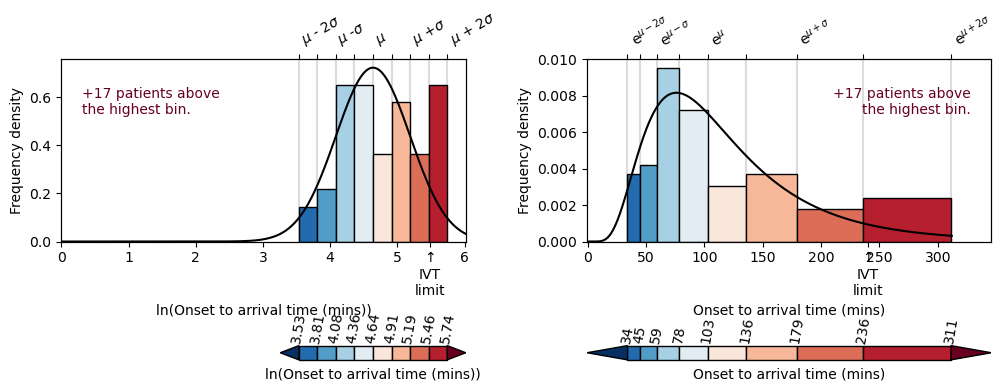

In [40]:
label = 'Onset to arrival time (mins)'

fig, axs = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={'height_ratios':[8, 1], 'wspace':0.3, 'hspace':1.0})
ax_log = axs[0, 0]
ax_log_cbar = axs[1, 0]
ax_times = axs[0, 1]
ax_times_cbar = axs[1, 1]

ax_log = draw_log_time_dist(ax_log, times, log_bins, log_bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_log_cbar = draw_log_times_colourbar(ax_log_cbar, ax_log, log_bins, colours_bars, colour_under, colour_over)

ax_times = draw_time_dist(ax_times, times, bins, bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_times_cbar = draw_times_colourbar(ax_times_cbar, ax_times, bins, colours_bars, colour_under, colour_over)


plt.savefig('./pathway_worked_example/time_dist_onset_to_arrival.png', bbox_inches='tight')
plt.show()


In [41]:
times_all = example_results['arrival_to_scan_mins'].values
times = times_all[np.where(times_all < 481)]

mu = hospital_performance['lognorm_mu_arrival_scan_arrival_mins_ivt']
sigma = hospital_performance['lognorm_sigma_arrival_scan_arrival_mins_ivt']

# (times_cmap_onset_to_arrival, 
#  colours_bars_onset_to_arrival, 
#  bins_onset_to_arrival, 
#  log_bins_onset_to_arrival) = make_colours(times, mu, sigma)

bins = bins_arrival_to_scan
log_bins = log_bins_arrival_to_scan

colours_bars = colours_bars_arrival_to_scan
colour_under = colour_under_arrival_to_scan
colour_over = colour_over_arrival_to_scan

log_bin_labels = log_bin_labels_arrival_to_scan
bin_labels = bin_labels_arrival_to_scan

# How many patients fall outside these bins?
n_too_low = len(np.where(times_all < bins[0])[0])
n_too_high = len(np.where(times_all > bins[-1])[0])

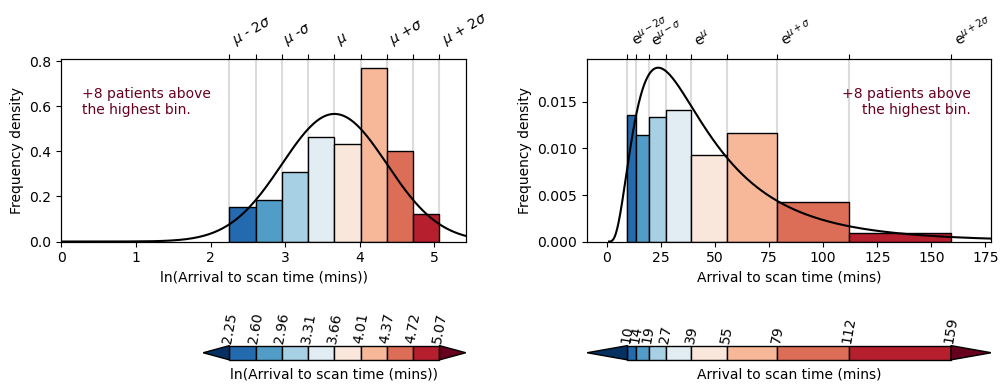

In [42]:
label = 'Arrival to scan time (mins)'

fig, axs = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={'height_ratios':[8, 1], 'wspace':0.3, 'hspace':1.0})
ax_log = axs[0, 0]
ax_log_cbar = axs[1, 0]
ax_times = axs[0, 1]
ax_times_cbar = axs[1, 1]

ax_log = draw_log_time_dist(ax_log, times, log_bins, log_bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_log_cbar = draw_log_times_colourbar(ax_log_cbar, ax_log, log_bins, colours_bars, colour_under, colour_over)

ax_times = draw_time_dist(ax_times, times, bins, bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_times_cbar = draw_times_colourbar(ax_times_cbar, ax_times, bins, colours_bars, colour_under, colour_over)

plt.savefig('./pathway_worked_example/time_dist_arrival_to_scan.png', bbox_inches='tight')
plt.show()


In [43]:
times_all = example_results['scan_to_needle_mins'].values
times = times_all[np.where(times_all < 481)]

mu = hospital_performance['lognorm_mu_scan_needle_mins_ivt']
sigma = hospital_performance['lognorm_sigma_scan_needle_mins_ivt']

# (times_cmap_onset_to_arrival, 
#  colours_bars_onset_to_arrival, 
#  bins_onset_to_arrival, 
#  log_bins_onset_to_arrival) = make_colours(times, mu, sigma)

bins = bins_scan_to_needle
log_bins = log_bins_scan_to_needle

colours_bars = colours_bars_scan_to_needle
colour_under = colour_under_scan_to_needle
colour_over = colour_over_scan_to_needle

log_bin_labels = log_bin_labels_scan_to_needle
bin_labels = bin_labels_scan_to_needle

# How many patients fall outside these bins?
n_too_low = len(np.where(times_all < bins[0])[0])
n_too_high = len(np.where(times_all > bins[-1])[0])

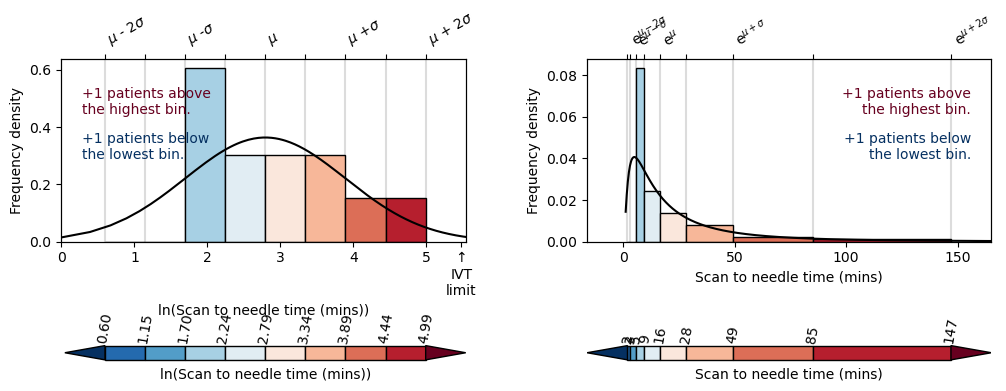

In [44]:
label = 'Scan to needle time (mins)'

fig, axs = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={'height_ratios':[8, 1], 'wspace':0.3, 'hspace':1.0})
ax_log = axs[0, 0]
ax_log_cbar = axs[1, 0]
ax_times = axs[0, 1]
ax_times_cbar = axs[1, 1]

ax_log = draw_log_time_dist(ax_log, times, log_bins, log_bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_log_cbar = draw_log_times_colourbar(ax_log_cbar, ax_log, log_bins, colours_bars, colour_under, colour_over)

ax_times = draw_time_dist(ax_times, times, bins, bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_times_cbar = draw_times_colourbar(ax_times_cbar, ax_times, bins, colours_bars, colour_under, colour_over)

plt.savefig('./pathway_worked_example/time_dist_scan_to_needle.png', bbox_inches='tight')
plt.show()


In [45]:
times_all = example_results['scan_to_puncture_mins'].values
times = times_all[np.where(times_all < 481)]

mu = hospital_performance['lognorm_mu_scan_puncture_mins_mt']
sigma = hospital_performance['lognorm_sigma_scan_puncture_mins_mt']

# (times_cmap_onset_to_arrival, 
#  colours_bars_onset_to_arrival, 
#  bins_onset_to_arrival, 
#  log_bins_onset_to_arrival) = make_colours(times, mu, sigma)

bins = bins_scan_to_puncture
log_bins = log_bins_scan_to_puncture

colours_bars = colours_bars_scan_to_puncture
colour_under = colour_under_scan_to_puncture
colour_over = colour_over_scan_to_puncture

log_bin_labels = log_bin_labels_scan_to_puncture
bin_labels = bin_labels_scan_to_puncture

# How many patients fall outside these bins?
n_too_low = len(np.where(times_all < bins[0])[0])
n_too_high = len(np.where(times_all > bins[-1])[0])

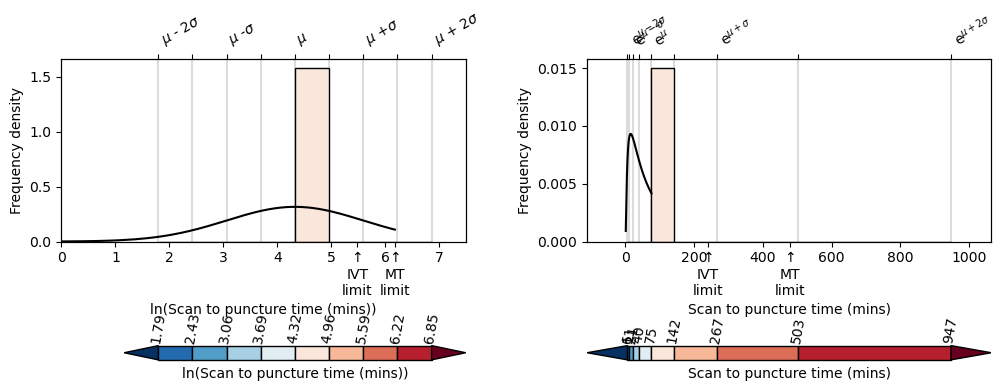

In [46]:
label = 'Scan to puncture time (mins)'

fig, axs = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={'height_ratios':[8, 1], 'wspace':0.3, 'hspace':1.0})
ax_log = axs[0, 0]
ax_log_cbar = axs[1, 0]
ax_times = axs[0, 1]
ax_times_cbar = axs[1, 1]

ax_log = draw_log_time_dist(ax_log, times, log_bins, log_bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_log_cbar = draw_log_times_colourbar(ax_log_cbar, ax_log, log_bins, colours_bars, colour_under, colour_over)

ax_times = draw_time_dist(ax_times, times, bins, bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_times_cbar = draw_times_colourbar(ax_times_cbar, ax_times, bins, colours_bars, colour_under, colour_over)

plt.savefig('./pathway_worked_example/time_dist_scan_to_puncture.png', bbox_inches='tight')
plt.show()


In [47]:
times_all = example_results['onset_to_scan_mins'].values
times = times_all#[np.where(times_all < 481)]

mu = np.nanmean(np.log(times))
sigma = np.nanstd(np.log(times))
# mu = 1.0#hospital_performance['lognorm_mu_scan_needle_mins_ivt']
# sigma = 1e-10#hospital_performance['lognorm_sigma_scan_needle_mins_ivt']

# (times_cmap_onset_to_arrival, 
#  colours_bars_onset_to_arrival, 
#  bins_onset_to_arrival, 
#  log_bins_onset_to_arrival) = make_colours(times, mu, sigma)

bins = bins_onset_to_scan
log_bins = log_bins_onset_to_scan

colours_bars = colours_bars_onset_to_scan
colour_under = colour_under_onset_to_scan
colour_over = colour_over_onset_to_scan

log_bin_labels = log_bin_labels_onset_to_scan
bin_labels = bin_labels_onset_to_scan

# How many patients fall outside these bins?
n_too_low = len(np.where(times_all < bins[0])[0])
n_too_high = len(np.where(times_all > bins[-1])[0])

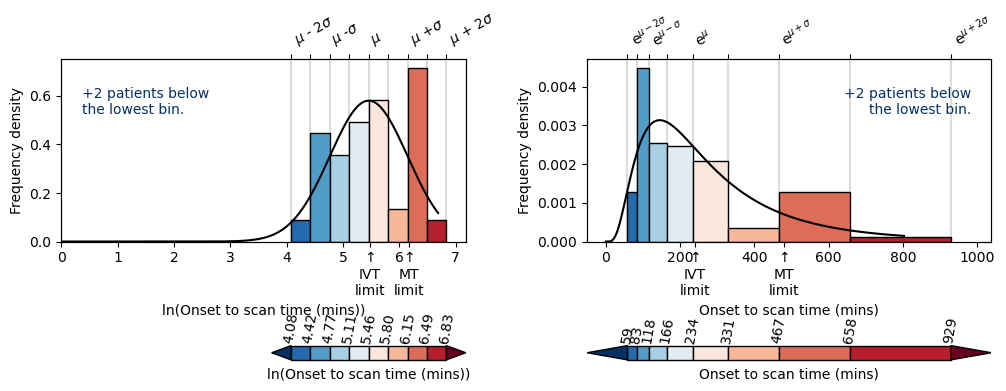

In [48]:
label = 'Onset to scan time (mins)'

fig, axs = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={'height_ratios':[8, 1], 'wspace':0.3, 'hspace':1.0})
ax_log = axs[0, 0]
ax_log_cbar = axs[1, 0]
ax_times = axs[0, 1]
ax_times_cbar = axs[1, 1]

ax_log = draw_log_time_dist(ax_log, times, log_bins, log_bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_log_cbar = draw_log_times_colourbar(ax_log_cbar, ax_log, log_bins, colours_bars, colour_under, colour_over)

ax_times = draw_time_dist(ax_times, times, bins, bin_labels, colours_bars, colour_over, colour_under, limit_ivt_mins, limit_mt_mins, mu, sigma)
ax_times_cbar = draw_times_colourbar(ax_times_cbar, ax_times, bins, colours_bars, colour_under, colour_over)

plt.savefig('./pathway_worked_example/time_dist_onset_to_scan.png', bbox_inches='tight')
plt.show()


## Binomial

In [49]:
def plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion):
    bars = [n_yes, n_no, n_rejected] if n_rejected > 0 else [n_yes, n_no]

    prop_of_all = n_yes / (n_yes + n_no + n_rejected)
    prop_of_mask = n_yes / (n_yes + n_no)

    labels = ['Yes', 'No', 'Rejected']
    colours = [colour_true, colour_false, colour_false]
    cumsum = np.append(0.0, np.cumsum(bars))
    for i, bar in enumerate(bars):
        ax.barh(
            0,
            bar,
            color=colours[i],
            edgecolor='k',
            left=cumsum[i],
            height=0.4
            )
        mid = np.mean([cumsum[i], cumsum[i+1]])
        ax.annotate(labels[i] + '\n' + str(bar), xy=(mid, 0), ha='center', va='center')
    # for i, n in enumerate([n_yes, n_no, n_rejected]):
    #     ax.annotate(f'{n}', xy=(i, n + 3))

    ax.annotate('', xy=[cumsum[0], -0.4], xytext=[cumsum[2], -0.4],
                arrowprops=dict(arrowstyle='<->'))
    ax.annotate(f'{100*prop_of_mask:.1f}% Yes', xy=(np.mean(cumsum[[0, 2]]), -0.5), ha='center', va='center')

    if n_rejected > 0:
        ax.annotate('', xy=[cumsum[0], 0.4], xytext=[cumsum[3], 0.4],
                    arrowprops=dict(arrowstyle='<->'))
        ax.annotate(f'{100*prop_of_all:.1f}% Yes', xy=(np.mean(cumsum[[0, 3]]), 0.5), ha='center', va='center')



    target_bar_yes = target_proportion * (n_yes + n_no)
    target_bar_no = (n_yes + n_no) - target_bar_yes
    target_bars = np.round([target_bar_yes, target_bar_no], 0)
    target_cumsum = np.append(0.0, np.cumsum(target_bars))
    for i, bar in enumerate(target_bars):
        ax.barh(
            -1.5,
            bar,
            color=colours[i],
            edgecolor='k',
            left=target_cumsum[i],
            height=0.4
            )
        mid = np.mean([target_cumsum[i], target_cumsum[i+1]])
        ax.annotate(labels[i] + '\n' + f'{bar:.0f}', xy=(mid, -1.5), ha='center', va='center')

    ax.annotate('', xy=[0, -1.1], xytext=[target_cumsum[2], -1.1],
                arrowprops=dict(arrowstyle='<->'))
    ax.annotate(f'{100*target_proportion:.1f}% Yes', xy=(np.mean(target_cumsum[[0, 2]]), -1.0), ha='center', va='center')


    ax.set_ylim(-2, 1)

    ax.set_xticks([])
    ax.set_yticks([0, -1.5])
    ax.set_yticklabels(['Generated', 'Target'])
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

    ax.set_title(title)
    return ax

### IVT

In [50]:
n_lists = []
target_proportions = []
axis_labels = []

In [51]:
target_proportion = hospital_performance['proportion1_of_all_with_onset_known_ivt']

arr = example_results['onset_time_known_bool'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where(arr==0)[0])
n_rejected = 0

title = 'Is onset time known?'

n_lists.append([n_yes, n_no, n_rejected])
target_proportions.append(target_proportion)
axis_labels.append(title)

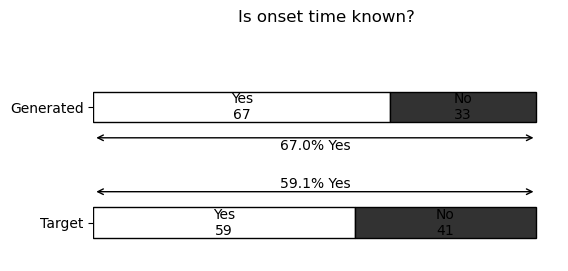

In [52]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)

plt.savefig('./pathway_worked_example/binomial_onset_known_ivt.png', bbox_inches='tight')
plt.show()

In [53]:
target_proportion = hospital_performance['proportion2_of_mask1_with_onset_to_arrival_on_time_ivt']

arr = example_results['ivt_mask2_mask1_and_onset_to_arrival_on_time'].values * 1
arr_before = example_results['ivt_mask1_onset_known'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Is onset to arrival on time for IVT?'

n_lists.append([n_yes, n_no, n_rejected])
target_proportions.append(target_proportion)
axis_labels.append(title)

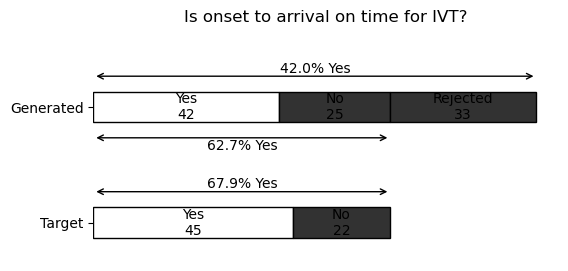

In [54]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_onset_to_arrival_ivt.png', bbox_inches='tight')
plt.show()

In [55]:
target_proportion = hospital_performance['proportion3_of_mask2_with_arrival_to_scan_on_time_ivt']

arr = example_results['ivt_mask3_mask2_and_arrival_to_scan_on_time'].values * 1
arr_before = example_results['ivt_mask2_mask1_and_onset_to_arrival_on_time'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Is arrival to scan on time for IVT?'

n_lists.append([n_yes, n_no, n_rejected])
target_proportions.append(target_proportion)
axis_labels.append(title)

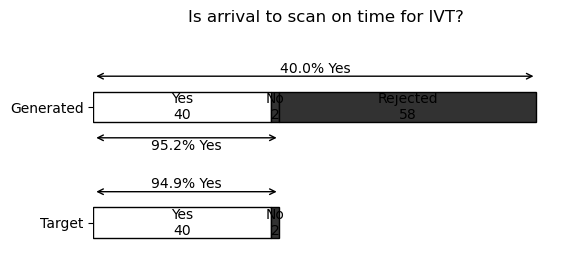

In [56]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_arrival_scan_ivt.png', bbox_inches='tight')
plt.show()

In [57]:
target_proportion = hospital_performance['proportion4_of_mask3_with_onset_to_scan_on_time_ivt']

arr = example_results['ivt_mask4_mask3_and_onset_to_scan_on_time'].values * 1
arr_before = example_results['ivt_mask3_mask2_and_arrival_to_scan_on_time'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Is onset to scan on time for IVT?'

n_lists.append([n_yes, n_no, n_rejected])
target_proportions.append(target_proportion)
axis_labels.append(title)

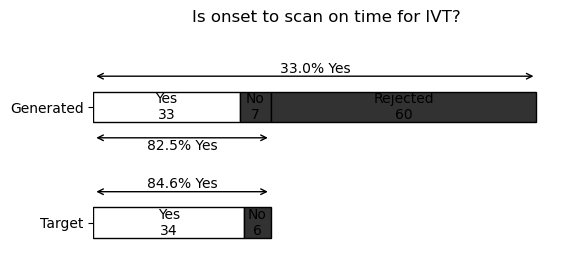

In [58]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_onset_scan_ivt.png', bbox_inches='tight')
plt.show()

In [59]:
target_proportion = hospital_performance['proportion5_of_mask4_with_enough_time_to_treat_ivt']

arr = example_results['ivt_mask5_mask4_and_enough_time_to_treat'].values * 1
arr_before = example_results['ivt_mask4_mask3_and_onset_to_scan_on_time'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Is there enough time left for IVT?'

n_lists.append([n_yes, n_no, n_rejected])
target_proportions.append(target_proportion)
axis_labels.append(title)

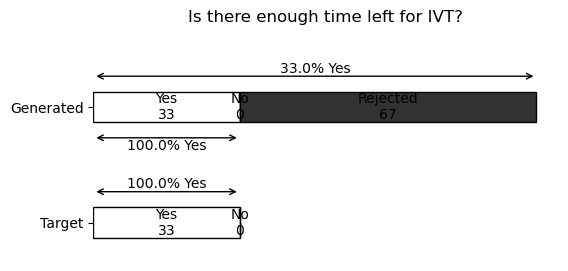

In [60]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_time_for_ivt.png', bbox_inches='tight')
plt.show()

In [61]:
target_proportion = hospital_performance['proportion6_of_mask5_with_treated_ivt']

arr = example_results['ivt_mask6_mask5_and_treated'].values * 1
arr_before = example_results['ivt_mask5_mask4_and_enough_time_to_treat'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Was IVT given?'

n_lists.append([n_yes, n_no, n_rejected])
target_proportions.append(target_proportion)
axis_labels.append(title)

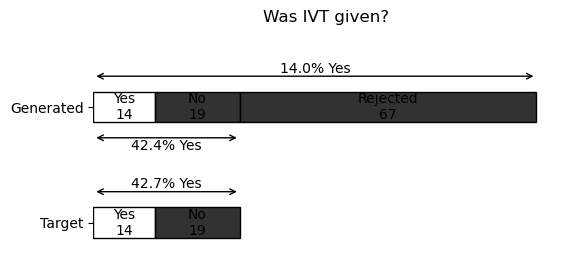

In [62]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_treated_ivt.png', bbox_inches='tight')
plt.show()

### MT

In [63]:
n_lists_mt = []
target_proportions_mt = []
axis_labels_mt = []

In [64]:
target_proportion = hospital_performance['proportion1_of_all_with_onset_known_mt']

arr = example_results['onset_time_known_bool'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where(arr==0)[0])
n_rejected = 0

title = 'Is onset time known?'

n_lists_mt.append([n_yes, n_no, n_rejected])
target_proportions_mt.append(target_proportion)
axis_labels_mt.append(title)

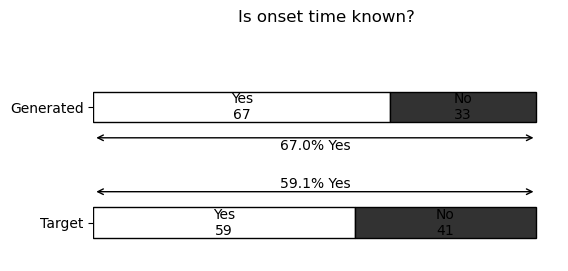

In [65]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)

plt.savefig('./pathway_worked_example/binomial_onset_known_mt.png', bbox_inches='tight')
plt.show()

In [66]:
target_proportion = hospital_performance['proportion2_of_mask1_with_onset_to_arrival_on_time_mt']

arr = example_results['mt_mask2_mask1_and_onset_to_arrival_on_time'].values * 1
arr_before = example_results['mt_mask1_onset_known'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Is onset to arrival on time for MT?'

n_lists_mt.append([n_yes, n_no, n_rejected])
target_proportions_mt.append(target_proportion)
axis_labels_mt.append(title)

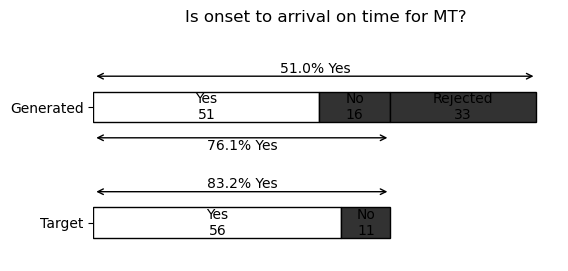

In [67]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_onset_to_arrival_mt.png', bbox_inches='tight')
plt.show()

In [68]:
target_proportion = hospital_performance['proportion3_of_mask2_with_arrival_to_scan_on_time_mt']

arr = example_results['mt_mask3_mask2_and_arrival_to_scan_on_time'].values * 1
arr_before = example_results['mt_mask2_mask1_and_onset_to_arrival_on_time'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Is arrival to scan on time for MT?'

n_lists_mt.append([n_yes, n_no, n_rejected])
target_proportions_mt.append(target_proportion)
axis_labels_mt.append(title)

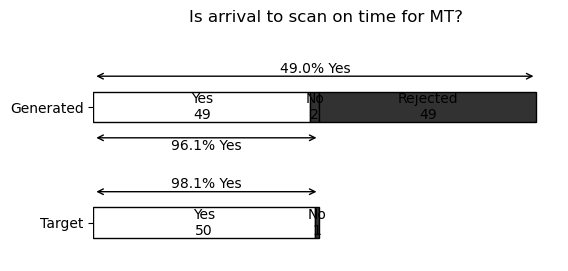

In [69]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_arrival_scan_mt.png', bbox_inches='tight')
plt.show()

In [70]:
target_proportion = hospital_performance['proportion4_of_mask3_with_onset_to_scan_on_time_mt']

arr = example_results['mt_mask4_mask3_and_onset_to_scan_on_time'].values * 1
arr_before = example_results['mt_mask3_mask2_and_arrival_to_scan_on_time'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Is onset to scan on time for MT?'

n_lists_mt.append([n_yes, n_no, n_rejected])
target_proportions_mt.append(target_proportion)
axis_labels_mt.append(title)

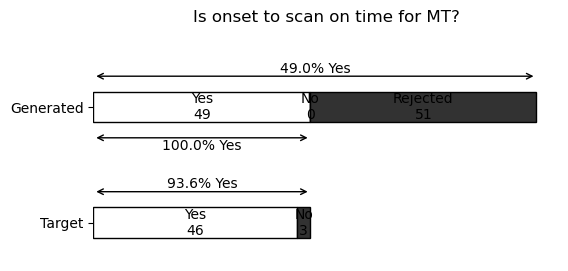

In [71]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_onset_scan_mt.png', bbox_inches='tight')
plt.show()

In [72]:
target_proportion = hospital_performance['proportion5_of_mask4_with_enough_time_to_treat_mt']

arr = example_results['mt_mask5_mask4_and_enough_time_to_treat'].values * 1
arr_before = example_results['mt_mask4_mask3_and_onset_to_scan_on_time'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Is there enough time left for MT?'

n_lists_mt.append([n_yes, n_no, n_rejected])
target_proportions_mt.append(target_proportion)
axis_labels_mt.append(title)

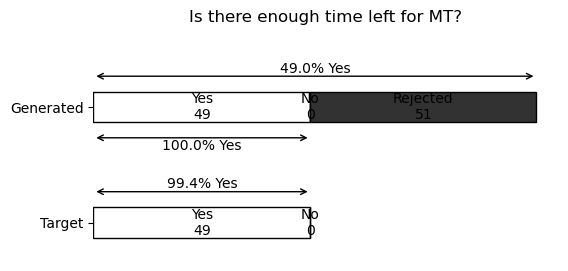

In [73]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_time_for_mt.png', bbox_inches='tight')
plt.show()

In [74]:
target_proportion = hospital_performance['proportion6_of_mask5_with_treated_mt']

arr = example_results['mt_mask6_mask5_and_treated'].values * 1
arr_before = example_results['mt_mask5_mask4_and_enough_time_to_treat'].values * 1

n_yes = len(np.where(arr==1)[0])
n_no = len(np.where((arr==0) & (arr_before==1))[0])
n_rejected = len(np.where(arr_before==0)[0])

title = 'Was MT given?'

n_lists_mt.append([n_yes, n_no, n_rejected])
target_proportions_mt.append(target_proportion)
axis_labels_mt.append(title)

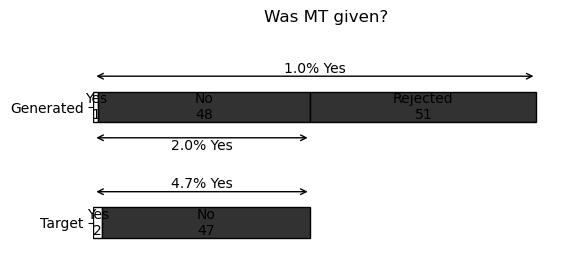

In [75]:
fig, ax = plt.subplots(figsize=(6, 3))
ax = plot_bars_yes_no(ax, n_yes, n_no, n_rejected, colour_true, colour_false, target_proportion)
plt.savefig('./pathway_worked_example/binomial_treated_mt.png', bbox_inches='tight')
plt.show()

### All masks

In [76]:
def plot_bars_all_masks(ax, n_lists, colour_true, colour_false, target_proportions, y_labels):

    labels = ['Yes', 'No', 'Rejected']
    colours = [colour_true, colour_false, colour_false]
    
    for b, bars in enumerate(n_lists):
        cumsum = np.append(0.0, np.cumsum(bars))
        for i, bar in enumerate(bars):
            ax.barh(
                -b,
                bar,
                color=colours[i],
                edgecolor='k',
                left=cumsum[i],
                height=0.8#0.4
                )
            mid = np.mean([cumsum[i], cumsum[i+1]])
            ax.annotate(labels[i] + '\n' + str(bar), xy=(mid, -b), ha='center', va='center')
    # for i, n in enumerate([n_yes, n_no, n_rejected]):
    #     ax.annotate(f'{n}', xy=(i, n + 3))

#             ax.annotate('', xy=[cumsum[0], -0.4], xytext=[cumsum[2], -0.4],
#                         arrowprops=dict(arrowstyle='<->'))
#             ax.annotate(f'{prop_of_mask:.3f} Yes', xy=(np.mean(cumsum[[0, 2]]), -0.5), ha='center', va='center')

#             if n_rejected > 0:
#                 ax.annotate('', xy=[cumsum[0], 0.4], xytext=[cumsum[3], 0.4],
#                             arrowprops=dict(arrowstyle='<->'))
#                 ax.annotate(f'{prop_of_all:.3f} Yes', xy=(np.mean(cumsum[[0, 3]]), 0.5), ha='center', va='center')


    # ax.set_ylim(-2, 1)

    ax.set_xticks([])
    ax.set_yticks(np.arange(0.0, -len(n_lists), -1.0))
    ax.set_yticklabels(y_labels)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_visible(False)

    # ax.set_title(title)
    return ax

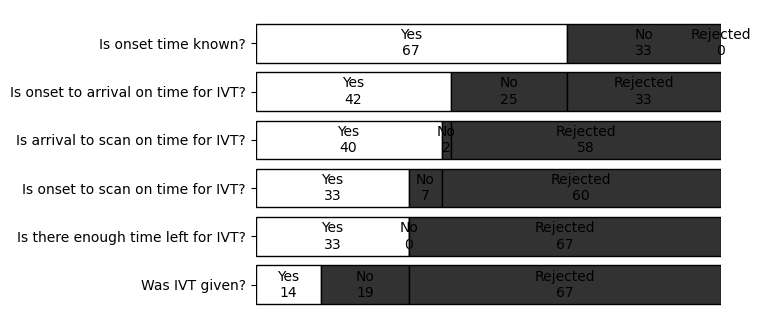

In [77]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = plot_bars_all_masks(ax, n_lists, colour_true, colour_false, target_proportions, axis_labels)

plt.savefig('./pathway_worked_example/masks_ivt.png', bbox_inches='tight')
plt.show()

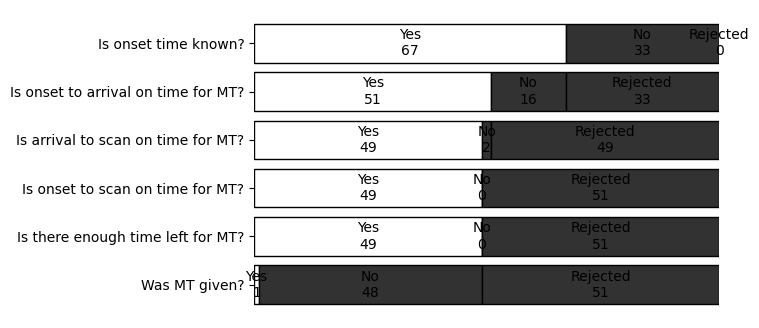

In [78]:
fig, ax = plt.subplots(figsize=(6, 4))

ax = plot_bars_all_masks(ax, n_lists_mt, colour_true, colour_false, target_proportions_mt, axis_labels_mt)

plt.savefig('./pathway_worked_example/masks_mt.png', bbox_inches='tight')
plt.show()

In [79]:
hospital_performance['proportion_of_all_with_ivt'] * 100.0

1.4918350401328532e+01